In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [12]:
print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(transactions_df.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [13]:
# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

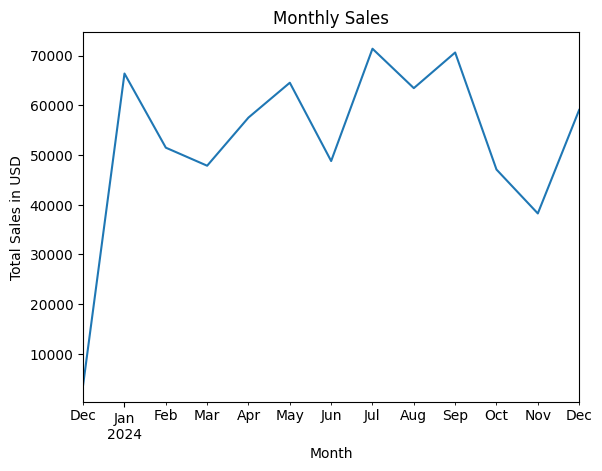

In [14]:
transactions_df['Month'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_sales = transactions_df.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line', title="Monthly Sales")
plt.ylabel("Total Sales in USD")
plt.show()


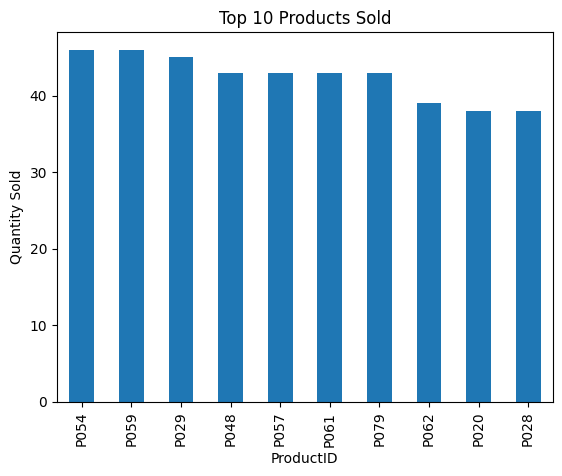

In [15]:
product_sales = transactions_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
top_products = product_sales.head(10)
top_products.plot(kind='bar', title="Top 10 Products Sold")
plt.ylabel("Quantity Sold")
plt.show()


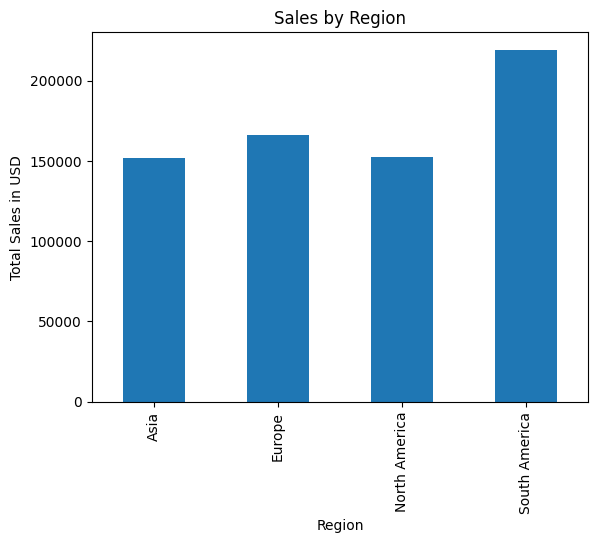

In [16]:
region_sales = pd.merge(transactions_df, customers_df, on='CustomerID').groupby('Region')['TotalValue'].sum()
region_sales.plot(kind='bar', title="Sales by Region")
plt.ylabel("Total Sales in USD")
plt.show()